In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib .pyplot as plt
import math
import sklearn
%matplotlib inline
from sklearn import preprocessing,linear_model



data=pd.read_csv('titanic.csv')
print(data.head(10))

   Survived  Pclass                                               Name  \
0         0       3                             Mr. Owen Harris Braund   
1         1       1  Mrs. John Bradley (Florence Briggs Thayer) Cum...   
2         1       3                              Miss. Laina Heikkinen   
3         1       1        Mrs. Jacques Heath (Lily May Peel) Futrelle   
4         0       3                            Mr. William Henry Allen   
5         0       3                                    Mr. James Moran   
6         0       1                             Mr. Timothy J McCarthy   
7         0       3                      Master. Gosta Leonard Palsson   
8         1       3   Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson   
9         1       2                 Mrs. Nicholas (Adele Achem) Nasser   

      Sex   Age  Siblings/Spouses Aboard  Parents/Children Aboard     Fare  
0    male  22.0                        1                        0   7.2500  
1  female  38.0                

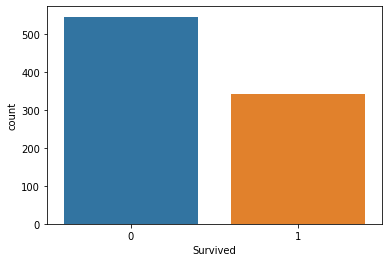

In [2]:
sns.countplot(x="Survived",data=data)


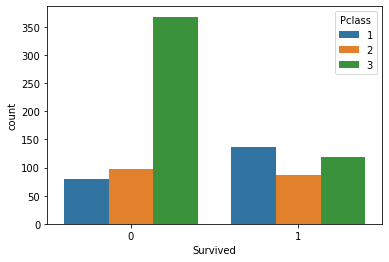

In [3]:
sns.countplot(x="Survived",hue="Pclass",data=data)

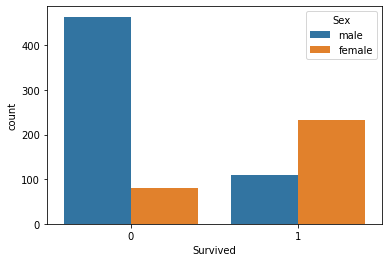

In [4]:
sns.countplot(x="Survived",hue="Sex",data=data)

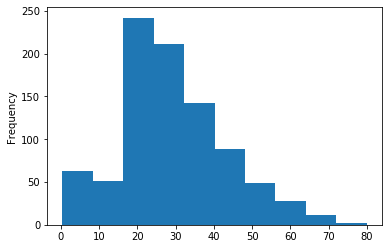

In [5]:
data['Age'].plot.hist()

In [6]:
data.isnull()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
882,False,False,False,False,False,False,False,False
883,False,False,False,False,False,False,False,False
884,False,False,False,False,False,False,False,False
885,False,False,False,False,False,False,False,False


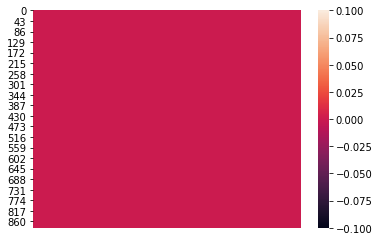

In [7]:
sns.heatmap(data.isnull(),xticklabels=False)

In [8]:
sex=pd.get_dummies(data['Sex'],drop_first=True)
sex.head(5)

,male
0,1
1,0
2,0
3,0
4,1


In [9]:
pa=pd.get_dummies(data["Pclass"],drop_first=True)
pa.head(5)

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [10]:
data=pd.concat([data,sex,pa],axis=1)

In [11]:
data.head(5)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,male,2,3
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500,1,0,1
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833,0,0,0
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250,0,0,1
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000,0,0,0
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500,1,0,1


In [12]:
data.drop(['Pclass','Name','Sex'],axis=1,inplace=True)

In [13]:
data.head(5)

,Survived,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,male,2,3
0,0,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,1,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,0
4,0,35.0,0,0,8.0500,1,0,1


In [14]:
data.corr()

,Survived,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,male,2,3
Survived,1.000000,-0.059665,-0.037082,0.080097,0.256179,-0.542152,0.091715,-0.320134
Age,-0.059665,1.000000,-0.297669,-0.193741,0.112329,0.091875,0.014398,-0.334814
Siblings/Spouses Aboard,-0.037082,-0.297669,1.000000,0.414244,0.158839,-0.113249,-0.057086,0.094702
Parents/Children Aboard,0.080097,-0.193741,0.414244,1.000000,0.215470,-0.244337,-0.001826,0.017760
Fare,0.256179,0.112329,0.158839,0.215470,1.000000,-0.181137,-0.119723,-0.412445
male,-0.542152,0.091875,-0.113249,-0.244337,-0.181137,1.000000,-0.063164,0.134552
2,0.091715,0.014398,-0.057086,-0.001826,-0.119723,-0.063164,1.000000,-0.564502
3,-0.320134,-0.334814,0.094702,0.017760,-0.412445,0.134552,-0.564502,1.000000


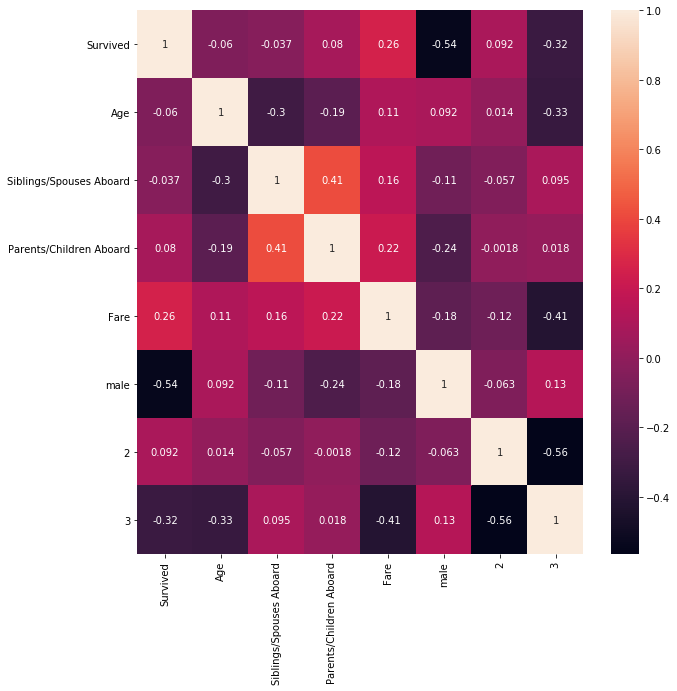

In [15]:
a=data.corr()
f=a.index
plt.figure(figsize=(10,10))
s=sns.heatmap(data[f].corr(),annot=True)

In [16]:

x=data.drop("Survived",axis=1)
y=data['Survived']

In [17]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size = 0.3)

In [18]:
logmodel=linear_model.LogisticRegression()


In [19]:
logmodel.fit(x_train,y_train)

C:\Users\Ranjith ch\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
predictions=logmodel.predict(x_test)

In [21]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [22]:
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.81      0.90      0.85       168\n           1       0.80      0.64      0.71        99\n\n    accuracy                           0.81       267\n   macro avg       0.80      0.77      0.78       267\nweighted avg       0.80      0.81      0.80       267\n'

In [23]:
confusion_matrix(y_test,predictions)

array([[152,  16],
       [ 36,  63]], dtype=int64)

In [24]:
accuracy_score(y_test,predictions)

0.8052434456928839

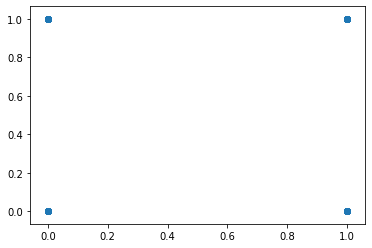

In [26]:
plt.scatter(y_test,predictions)

([<matplotlib.patches.Wedge at 0x214781e9208>,
 [Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.099446196622535, 0.0349007268153815, ''),
  Text(1.0977853441231966, 0.06976631155733329, ''),
  Text(1.0977853441231966, 0.06976631155733329, ''),
  Text(1.0977853441231966, 0.06976631155733329, ''),
  Text(1.0977853441231966, 0.06976631155733329, ''),
  Text(1.0977853441231966, 0.06976631155733329, ''),
  Text(2.090491037421176, 0.1996176907534371, ''),
  Text(2.0736216662694584, 0.3318029312376168, ''),
  Text(1.0801215670258921, 0.2081763686049204, ''),
  Text(1.0801215670258921, 0.2081763686049204, ''),
  Text(1.0729727656240828, 0.242341585843221, ''),
  Text(2.0149352447478117, 0.5916383688310596, ''),
  Text(1.0450782296164798, 0.3432367899594745, ''),
  Text(1.0336618829868065, 0.37622215732219944, ''),
  Text(1.9238277609308256, 0.8419541236147527, ''),
  Text(0.9777189937438652, 0.5040491734667203, ''),
  Text(0.9612343150296582, 0.5

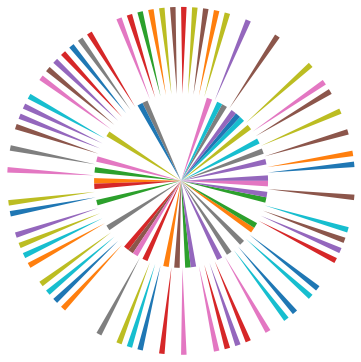

In [27]:
plt.pie(y_test,predictions)